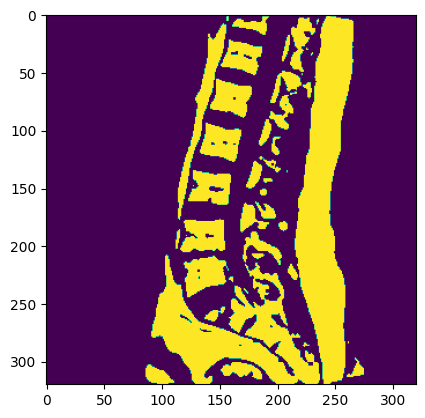

In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the RGB image
img = cv2.imread('./spainal_data_v2/train_images/T1_0001_S8/images/T1_0001_S8.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Preprocess the image
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply thresholding to get a binary image
#ret, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(thresh)

In [73]:
# Apply the Watershed algorithm
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening,kernel,iterations=3)
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown==255] = 0
markers = cv2.watershed(img, markers)

# Post-process the mask
markers[markers == -1] = 0
markers = markers.astype(np.uint8)
mask = cv2.bitwise_not(markers)

9

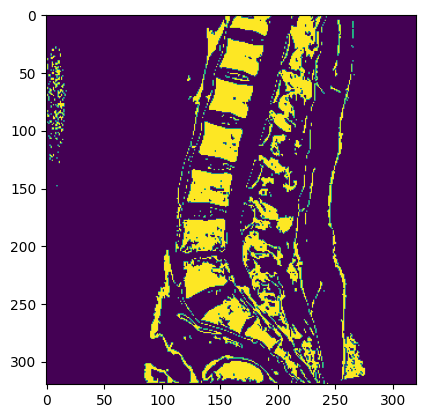

In [3]:
# Read the image
img = cv2.imread('./spainal_data_v2/train_images/T1_0001_S8/images/T1_0001_S8.png')
#img=cv2.resize(img,(50,50))
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the lower and upper threshold values
lower_thresh = 70
upper_thresh = 120

# Apply thresholding between the lower and upper threshold values
mask_th = cv2.inRange(gray, lower_thresh, upper_thresh)
#binary = cv2.threshold(mask, 200, 0, cv2.THRESH_BINARY_INV)[1]
#ret, thresh = cv2.threshold(mask, 250, 1, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(mask_th)

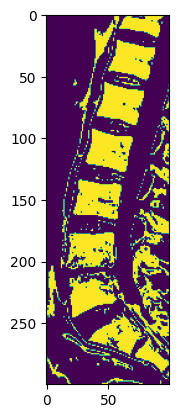

In [5]:
# Slice the ROI from the image
roi = mask_th[:300, 100:200]

plt.imshow(roi)

In [53]:
mask_th.shape

(320, 320)

In [56]:
zeros_array = np.zeros((320,320))

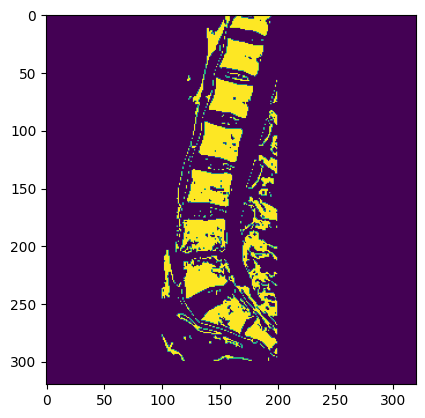

In [6]:
new_mask = np.zeros((320, 320))
#zeros_array_with_roi[roi]=roi

new_mask[:300, 100:200] = roi

plt.imshow(new_mask)

In [58]:
new_mask.shape

(320, 320)

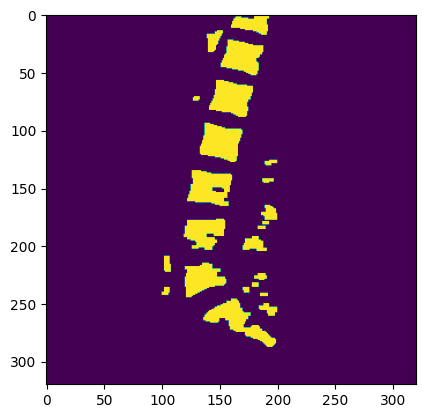

In [59]:
# Define the structuring element for erosion and dilation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,3))
# Apply erosion to remove small lines
eroded = cv2.erode(new_mask, kernel, iterations=1)

# Apply dilation to restore the original shape of larger lines
dilated = cv2.dilate(eroded, kernel, iterations=1)

# Apply morphological closing to fill in small gaps
closed = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)

# Apply morphological opening to remove small objects
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)

# Display the binary image
plt.imshow(opened)

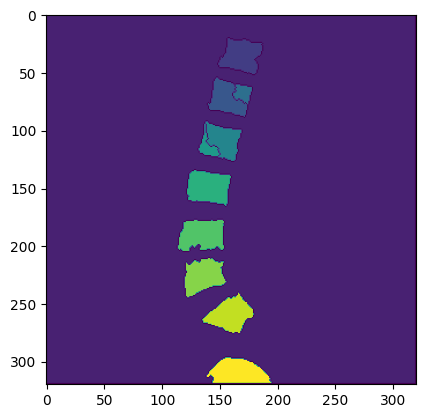

In [97]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

# Apply the Watershed algorithm
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(mask_th, cv2.MORPH_OPEN, kernel, iterations=0)
sure_bg = cv2.dilate(opening,kernel,iterations=5)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown==255] = 0
markers = cv2.watershed(img, markers)

# Post-process the mask
markers[markers == -1] = 0
markers = markers.astype(np.uint8)
#mask = cv2.bitwise_not(markers)

plt.imshow(markers)

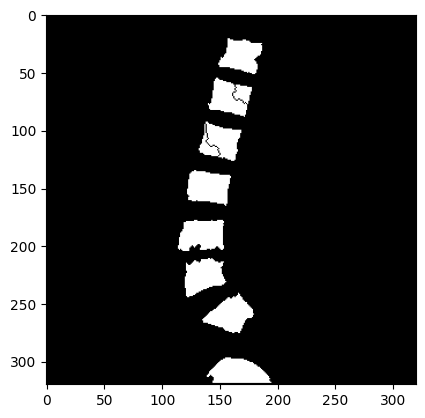

In [98]:
import cv2

# Convert the image to grayscale
#gray = cv2.cvtColor(markers, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding with a threshold value of 1
ret, binary = cv2.threshold(markers, 1, 255, cv2.THRESH_BINARY)

# Display the binary image
plt.imshow(binary,cmap='binary_r')
plt.imsave(arr=binary,cmap='binary_r',fname='alaa.png')

In [93]:
img=cv2.imread(r'data\whatershed_masks\alaa.png')
img.shape

(320, 320, 3)